In [2]:
%config Completer.use_jedi = False
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from RobotDynamic import *

<IPython.core.display.Javascript object>


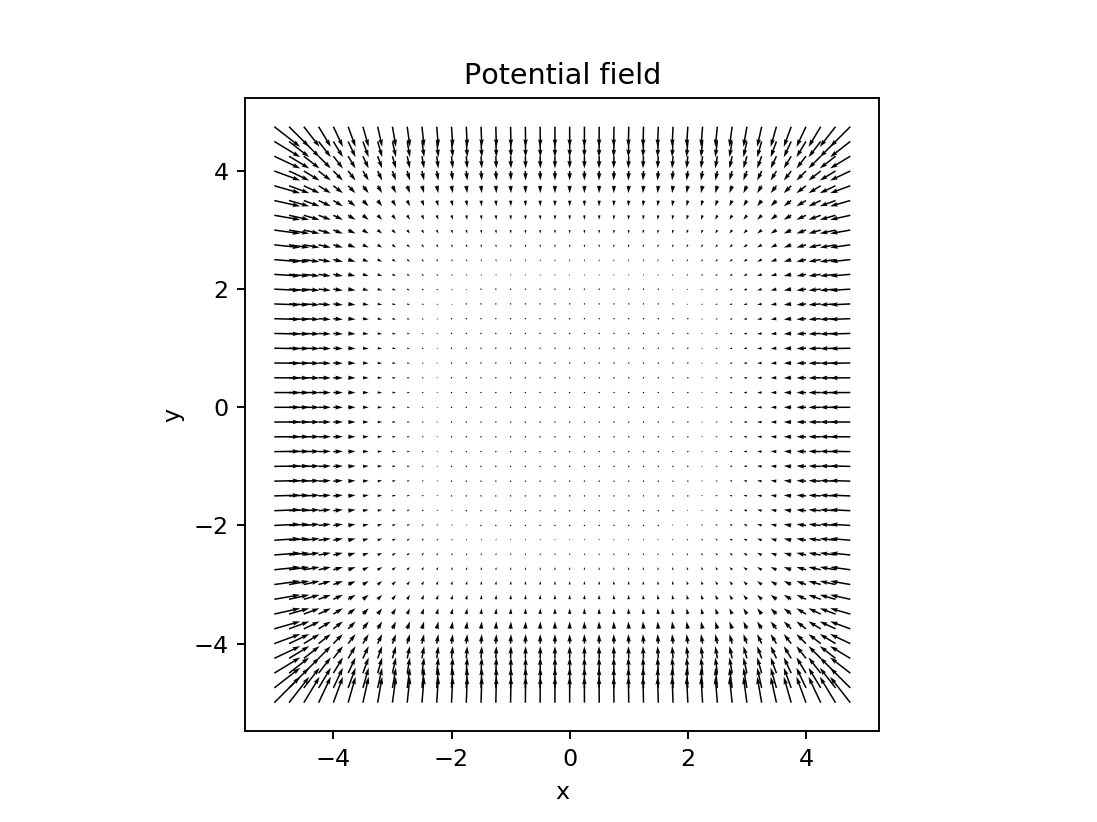

In [103]:
rep_line = lambda x,y : (1*x,0*y)#/sqrt(x**2+y**2)
rep_exp_vg = lambda x,y,x0 : (np.exp(-x+x0),0*y)
rep_exp_vd = lambda x,y,x0 : (-np.exp(x-x0),0*y)
rep_exp_hg = lambda x,y,y0 : (0*x,np.exp(-y+y0))
rep_exp_hd = lambda x,y,y0 : (0*x,-np.exp(y-y0))

lim_b = 0
border = lambda x,y : (np.exp(-x+lim_b)-np.exp(x-lim_b),
                       np.exp(-y+lim_b)-np.exp(y-lim_b))
rep_gain = 1
rep_pt = lambda x,y,x0,y0 : (rep_gain*(2*(x-x0)/np.power(np.power(x-x0,2)+np.power(y-y0,2),2)),
                             rep_gain*(2*(y-y0)/np.power(np.power(x-x0,2)+np.power(y-y0,2),2)))

r_line = lambda x,y : rep_line(x,y)

attract_pt = lambda x,y,x0,y0 : (-x+x0,-y+y0)/sqrt((x-x0)**2+(y-y0)**2)
attract_line_v = lambda x,y,x0 : (-x+x0,0)#/sqrt((x-x0)**2+(y-y0)**2) 
attract_line_h = lambda x,y,y0 : (0,-y+y0)#/sqrt((x-x0)**2+(y-y0)**2) 

def combi(x,y,foo_array):
    res = [0,0]
    
    for foo in foo_array:  
        T1 = foo(x,y)
        res[0] += T1[0]
        res[1] += T1[1]
        
    return res

a_line_v1 = lambda x,y : attract_line_v(x,y,2)
a_line_v2 = lambda x,y : attract_line_v(x,y,-2)

r_exp_v1 = lambda x,y : rep_exp_vd(x,y,1)
r_exp_v2 = lambda x,y : rep_exp_vg(x,y,-1)

r_exp_v3 = lambda x,y : rep_exp_hg(x,y,1)
r_exp_v4 = lambda x,y : rep_exp_hd(x,y,-1)

r_pt_1 = lambda x,y : rep_pt(x,y,0,0)

mul = lambda x,y : combi(x,y,[r_exp_v1,r_exp_v2,r_exp_v3,r_exp_v4,r_pt_1])
mul = lambda x,y : combi(x,y,[r_exp_v1,r_exp_v2,r_exp_v3,r_exp_v4])
mul = lambda x,y : combi(x,y,[border])
#mul = lambda x,y : combi(x,y,[r_pt_1])

lim = 5
step = lim/20
fig, ax = plt.subplots()
grid_pts = np.arange(-lim,lim,step)
X1,X2 = np.meshgrid(grid_pts,grid_pts)
VX,VY = mul(X1,X2)

ax.quiver(grid_pts,grid_pts,VX,VY)
ax.set_aspect(1)
ax.set_title("Potential field")
ax.set_xlabel("x")
ax.set_ylabel("y")

plt.show()

<IPython.core.display.Javascript object>


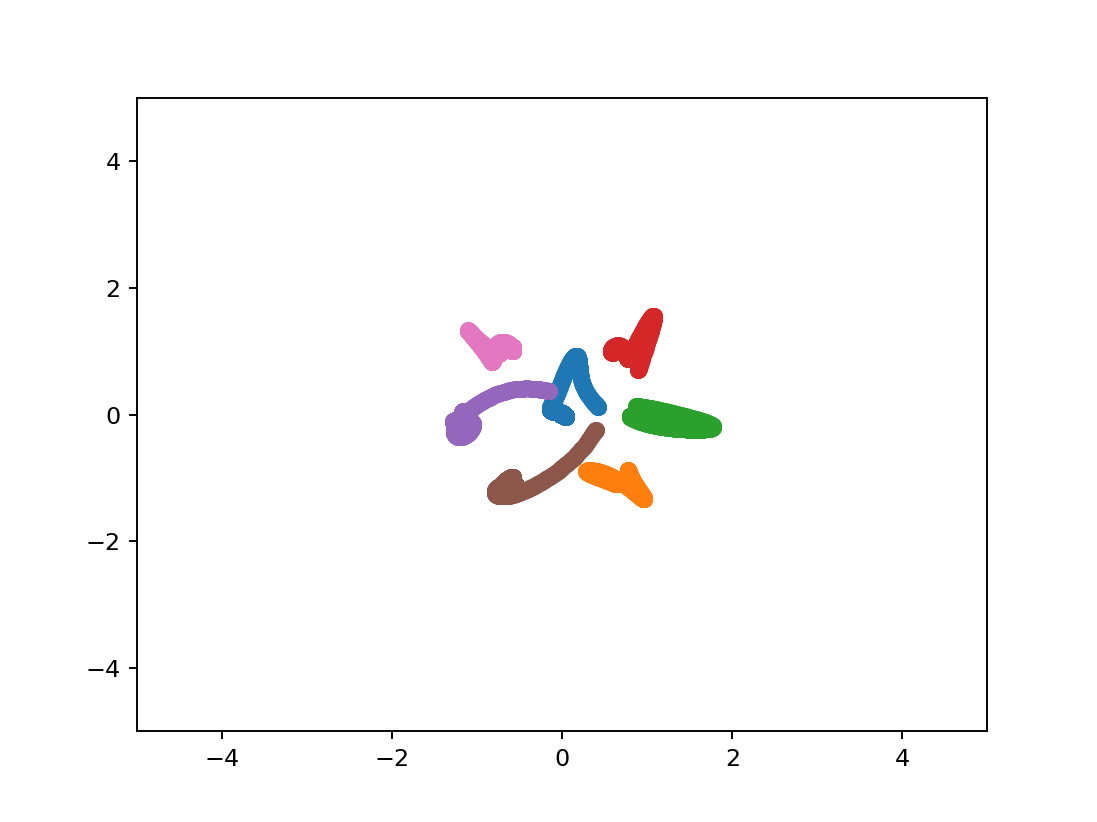

<IPython.core.display.Javascript object>


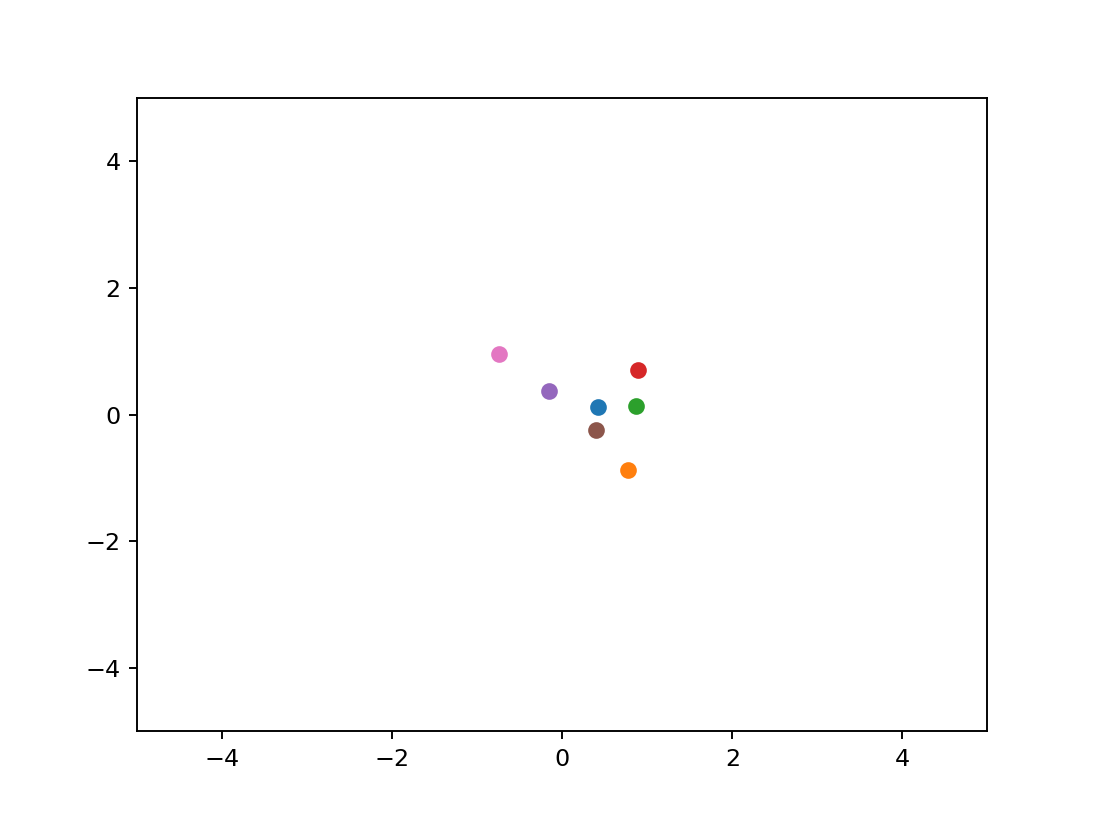

<IPython.core.display.Javascript object>


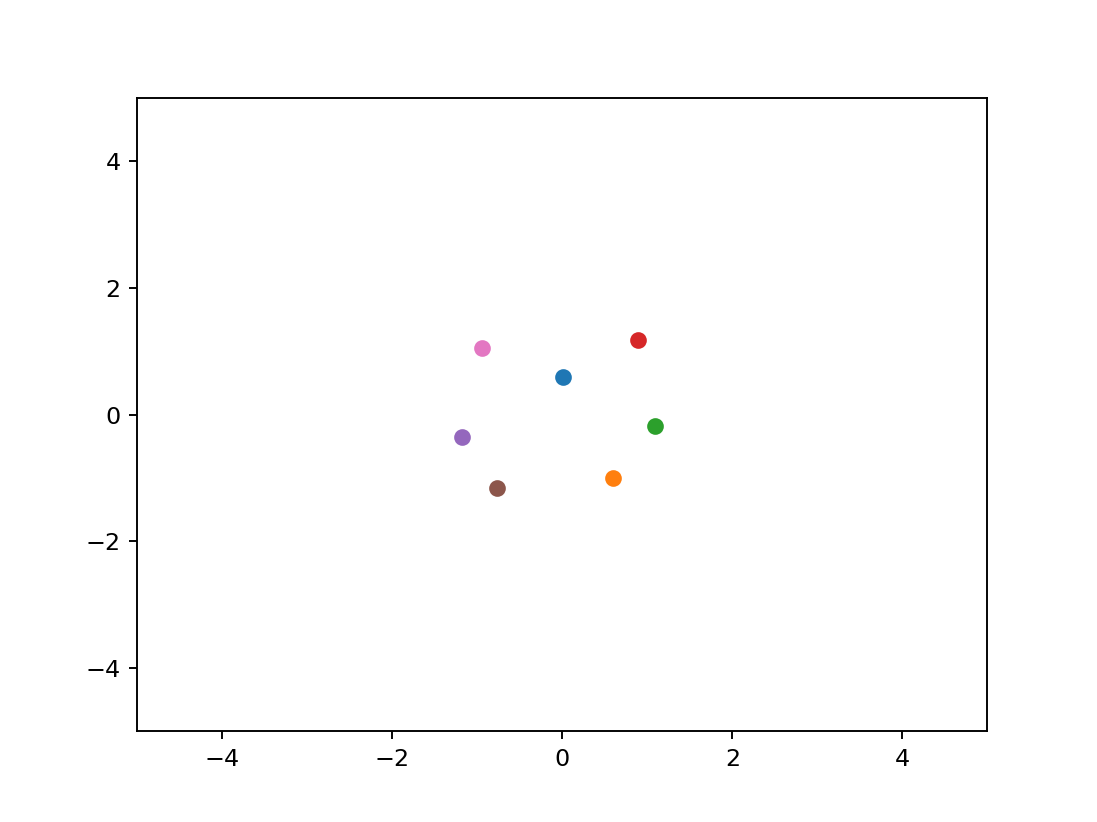

<IPython.core.display.Javascript object>


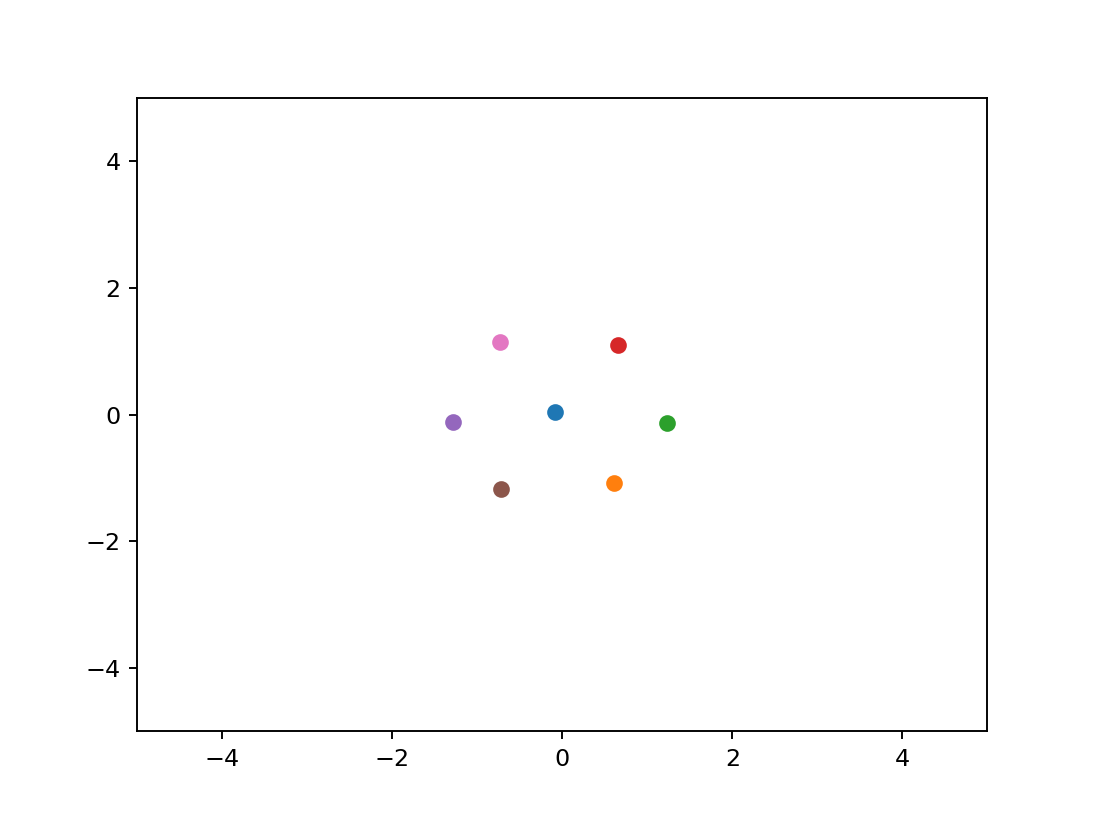

<IPython.core.display.Javascript object>


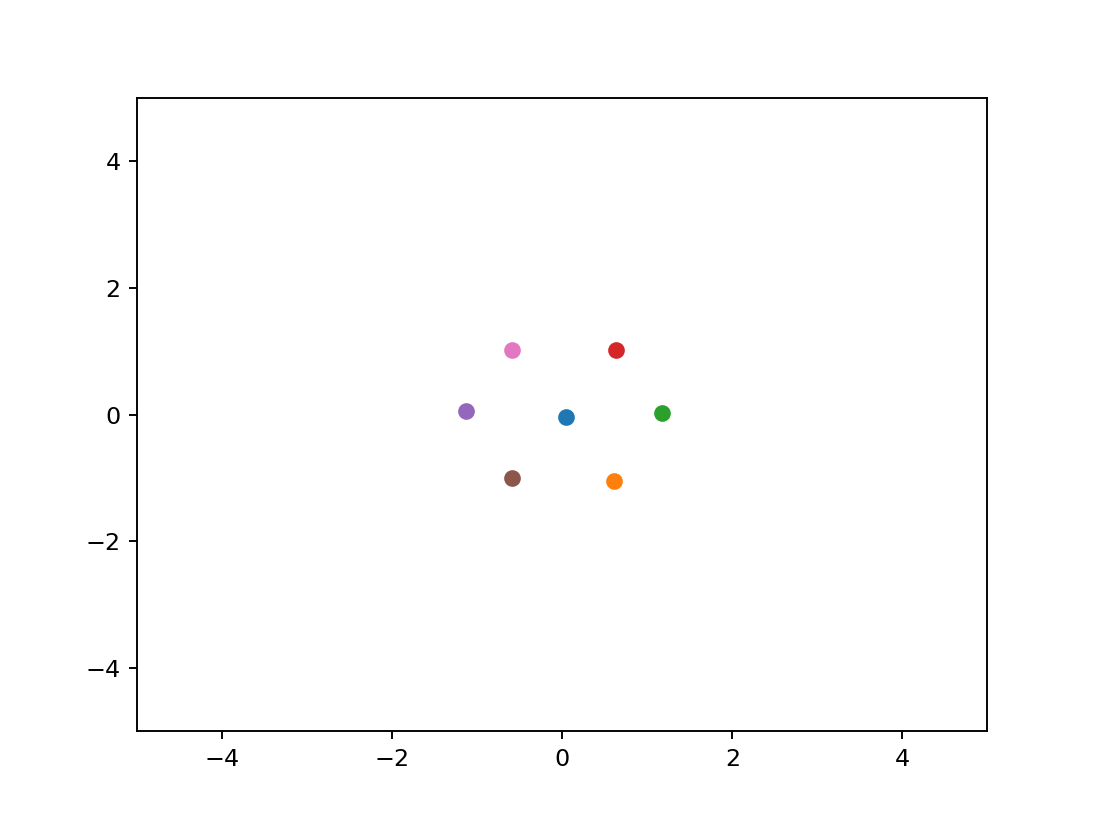

<IPython.core.display.Javascript object>


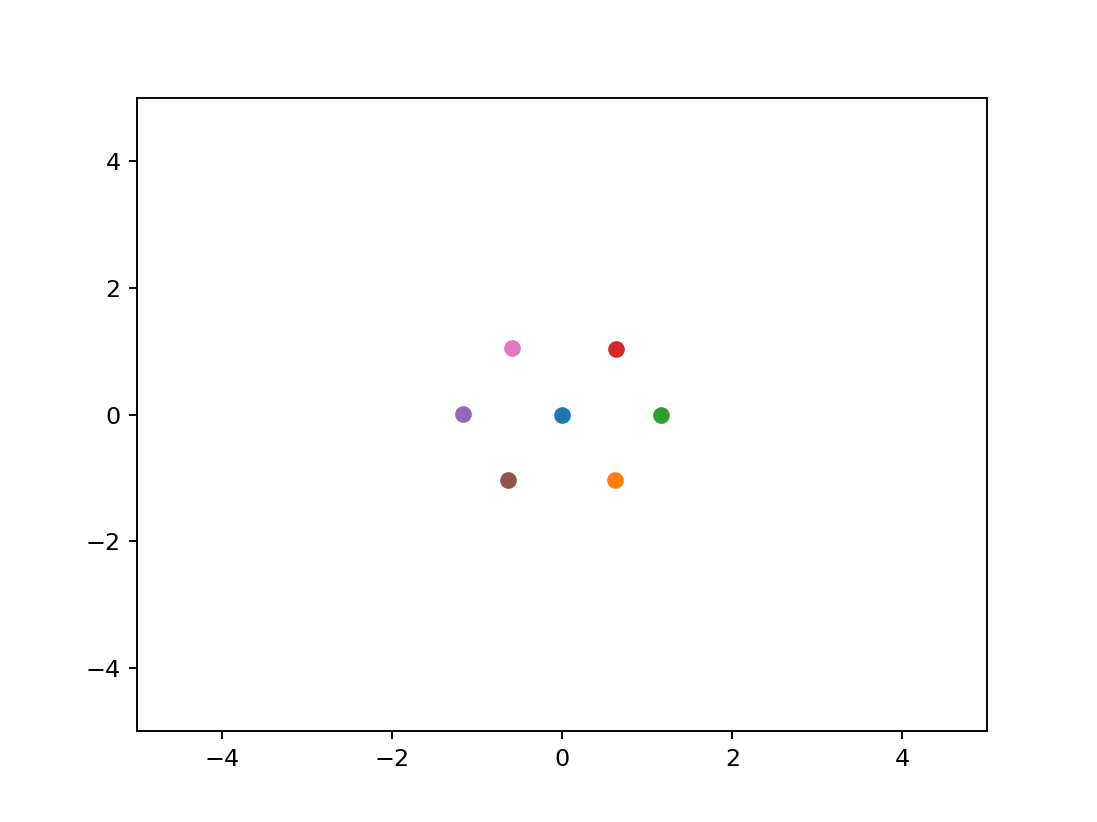

<IPython.core.display.Javascript object>


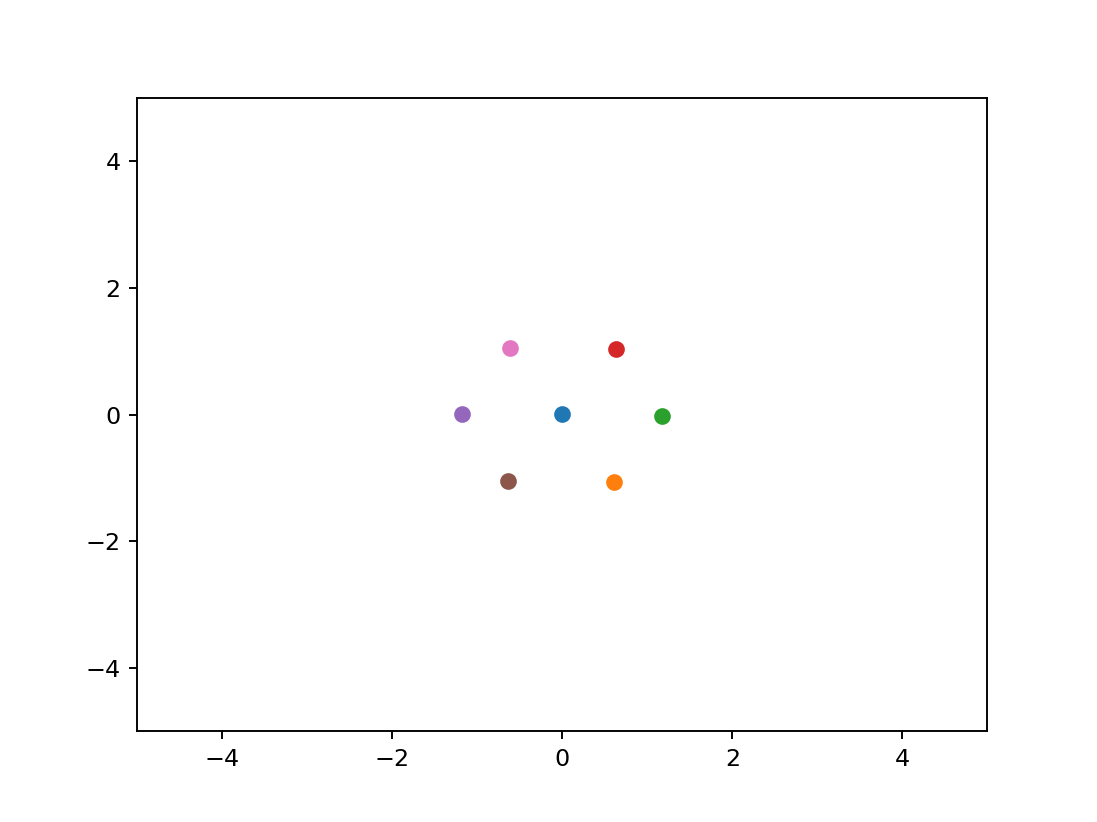

<IPython.core.display.Javascript object>


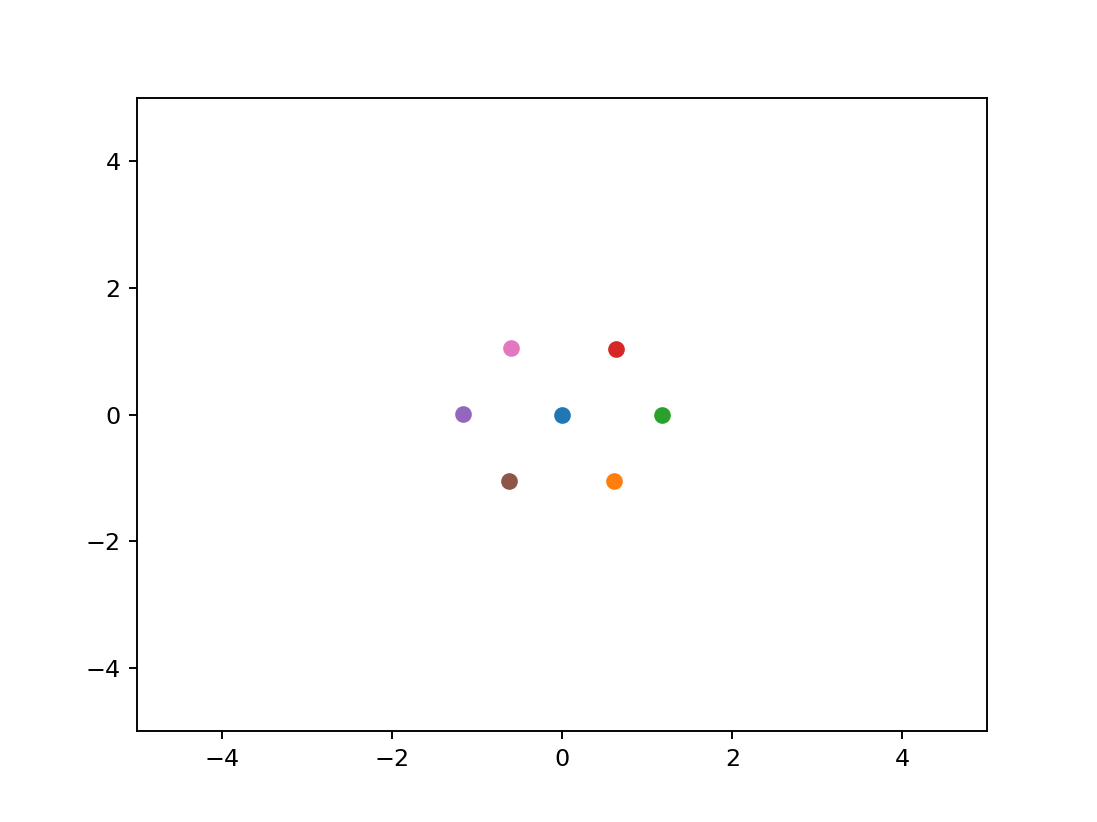

<IPython.core.display.Javascript object>


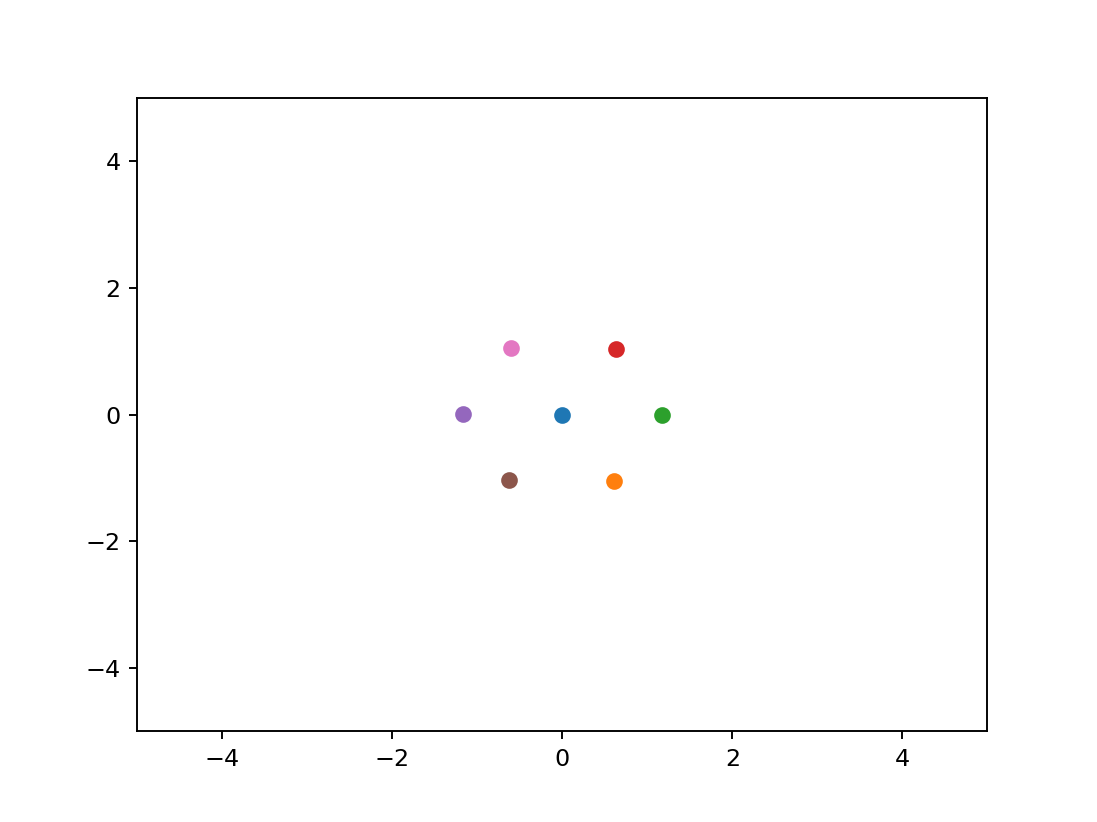

<IPython.core.display.Javascript object>


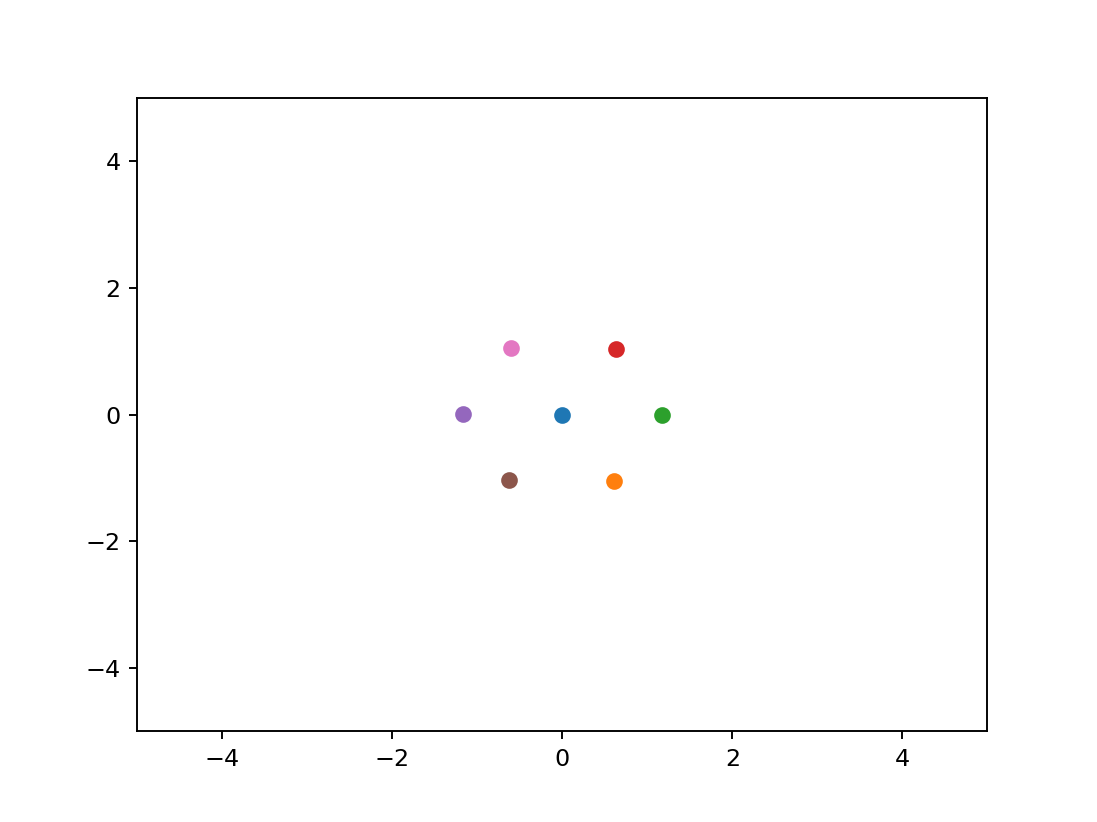

<IPython.core.display.Javascript object>


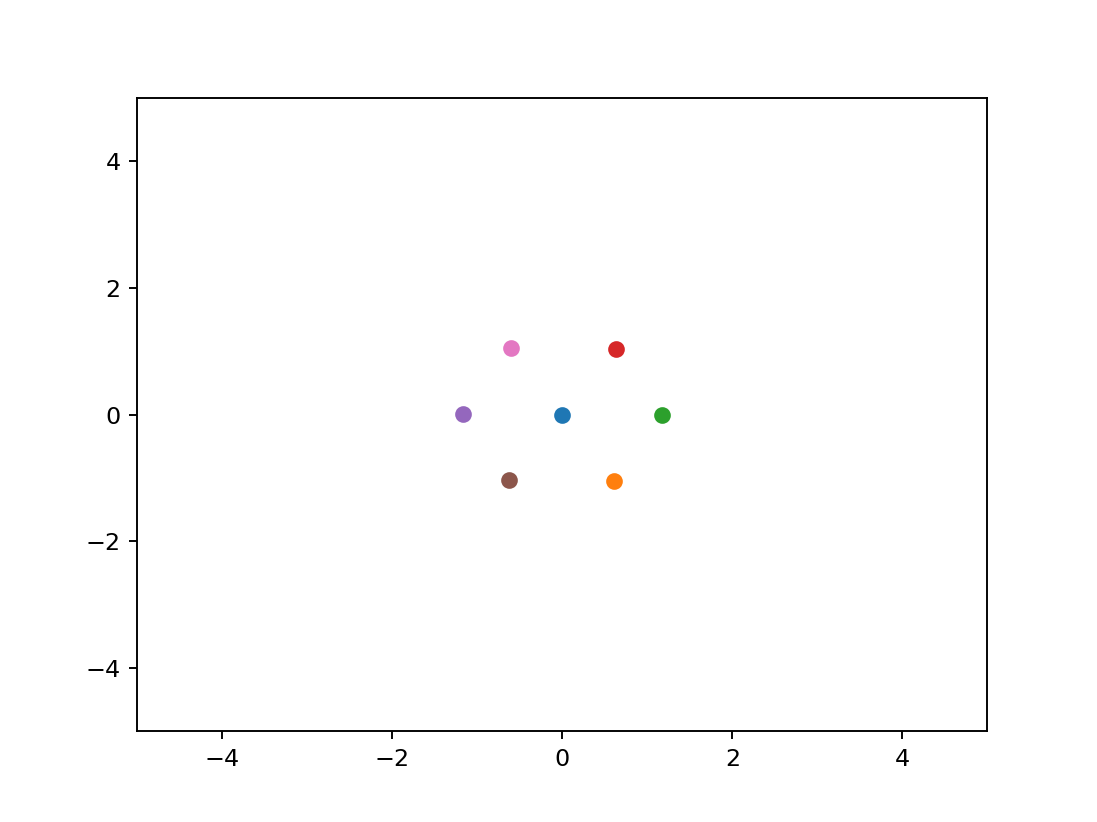

In [115]:
N = 2000
nbrob = 7
plot_lim = 5
sat_gain = 20

area_limit_f = border

def Simul2D(sys):
    Xs = np.ones((nbrob,4,N))
    Us = np.zeros((nbrob,2,N))

    for i in range(nbrob):
        Xs[i] = np.array([np.zeros(N),
                          np.zeros(N),
                          np.ones(N)*((np.random.rand()-0.5)*2),
                          np.ones(N)*((np.random.rand()-0.5)*2)])
        
    for k in range(N-1):
        for i in range(nbrob):
            
            for j in range(nbrob):
                if i == j:
                    continue
                Us[i,:,k] += rep_pt(Xs[i,2,k],Xs[i,3,k],Xs[j,2,k],Xs[j,3,k])

            Us[i,:,k] += np.array(area_limit_f(Xs[i,2,k],Xs[i,3,k]))
            
            if abs(Us[i,0,k]) > sat_gain:
                Us[i,0,k] = np.sign(Us[i,0,k])*sat_gain
            if abs(Us[i,1,k]) > sat_gain:
                Us[i,1,k] = np.sign(Us[i,1,k])*sat_gain
                
            Xs[i,:,k+1] = sys(Xs[i,:,k],0.5*Us[i,:,k]).T
    
    plt.figure()
    for i in range(nbrob):
        plt.scatter(Xs[i,2,:],Xs[i,3,:])
    plt.xlim([-plot_lim, plot_lim])
    plt.ylim([-plot_lim, plot_lim])
    plt.show()
    
    for k in range(0,N,200):
        plt.figure()
        for i in range(nbrob):
            plt.scatter(Xs[i,2,k],Xs[i,3,k])
        plt.xlim([-plot_lim, plot_lim])
        plt.ylim([-plot_lim, plot_lim])
        plt.show()

Simul2D(DroneSys)